In [31]:
import numpy as np
import pandas as pd
import corner
import matplotlib.pyplot as plt
import scipy
import csv
plt.rcParams['figure.figsize']=(14.4,7.4)

[1.341 1.641 1.941 2.241 2.541 2.841 3.141 3.441 3.741 4.041 4.341 4.641
 4.941 5.241 5.541 5.841 6.141 6.441]
[4.4642469e-08 2.1417449e-08 3.0064271e-08 1.4119474e-08 1.4170475e-08
 1.6503236e-08 1.5904115e-08 2.8677555e-08 1.2044566e-08 1.0822393e-08
 1.2346848e-08 1.9457129e-08 3.3177496e-08 4.3603556e-08 4.0886103e-08
 3.6623238e-08 3.1313128e-08 1.1291703e-07]


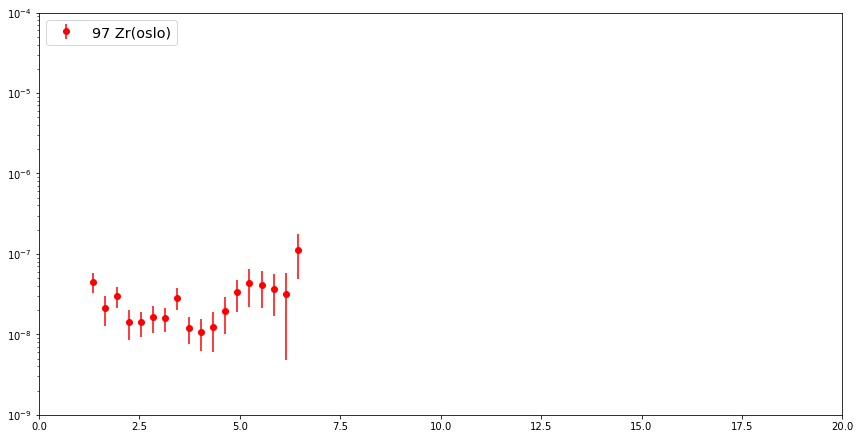

In [43]:
# reading and plotting the oslo data for 300 bin (6,9)
df=pd.read_csv("gsf_300(6,9).csv")

#convert to numpy arrays
array1=df["energy"].values 
array2=df["gsf"].values
array3=df["errors"].values

print(array1)

print(array2)




fig = plt.figure()


plt.errorbar(array1, array2,yerr=array3,fmt="o", color="r",ecolor='r',label='97 Zr(oslo)')

plt.yscale("log")

plt.xlim(0, 20)
plt.ylim(10**(-9),10**(-4))

plt.legend(loc ='upper left',fontsize="x-large")
plt.show()

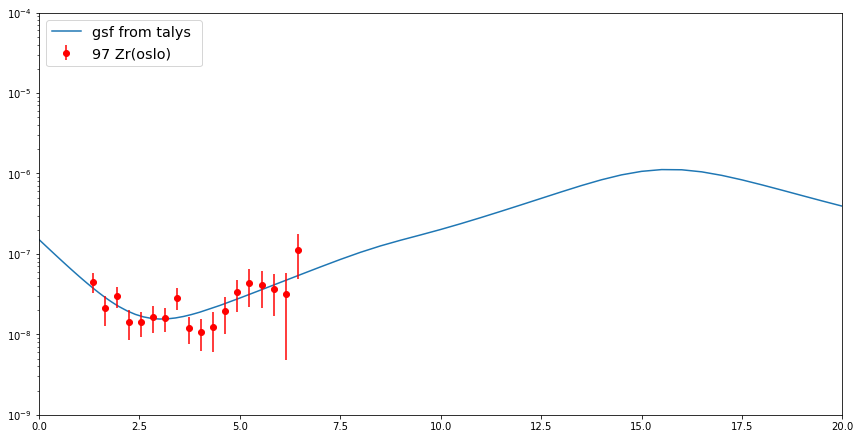

In [44]:
# reading and plotting the talys model


df2=pd.read_csv("gsf_300(6,9)_talys.csv")



energy=df2["energy"].values
gsf=df2["gsf"].values


fig = plt.figure()


plt.plot(energy,gsf,label='gsf from talys ')
plt.errorbar(array1, array2,yerr=array3,fmt="o", color="r",ecolor='r',label='97 Zr(oslo)')

plt.yscale("log")

plt.xlim(0, 20)
plt.ylim(10**(-9),10**(-4))

plt.legend(loc ='upper left',fontsize="x-large")
plt.show()

In [33]:
#linear interpolation for the values of energy/x in the oslo data
# needed for the likelihood function


intp_gsf = np.interp(array1, energy, gsf)



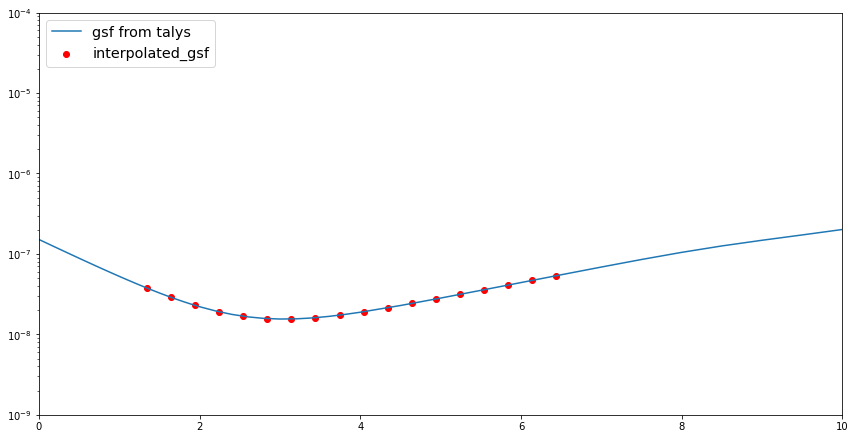

In [49]:
#verification whether the interpolation did its job!!! interpolated data vs model

fig = plt.figure()


plt.plot(energy,gsf,label='gsf from talys ')

plt.scatter(array1,intp_gsf,label='interpolated_gsf',color='r')

plt.yscale("log")

plt.xlim(0, 10)
plt.ylim(10**(-9),10**(-4))

plt.legend(loc ='upper left',fontsize="x-large")
plt.show()

In [39]:
print(intp_gsf)
print(array1)

[3.78092525e-08 2.89731318e-08 2.29916988e-08 1.91498360e-08
 1.68536219e-08 1.57281430e-08 1.55613761e-08 1.61308836e-08
 1.73586455e-08 1.91623128e-08 2.15588208e-08 2.43575256e-08
 2.76097716e-08 3.16162946e-08 3.59554379e-08 4.12292759e-08
 4.71246588e-08 5.37209328e-08]
[1.341 1.641 1.941 2.241 2.541 2.841 3.141 3.441 3.741 4.041 4.341 4.641
 4.941 5.241 5.541 5.841 6.141 6.441]


In [54]:

am=np.array([1,3,5])

def model_8(g,a,b):
    return a*g+b


k=model_8(am,2,1)

print(am)
print(k)

[1 3 5]
[ 3  7 11]
